# <center> 데이터사이언스개론 </center>
## <center> Data Summary과제 </center>

<div class="pull-right"> 컴퓨터공학과 201811259 배수빈 </div>

----
#### 0-1. 라이브러리 불러오기 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- pandas : 데이터 프레임 활용을 위한 라이브러리
- numpy : percentile, boxplot을 위한 라이브러리
- matplotlib: 그래프를 그리기 위한 라이브러리

----
#### 0-2. 엑셀파일 불러오기, 데이터프레임 생성

In [2]:
xlfile = "db_score.xlsx"

df = pd.read_excel(xlfile)
df2 = df.drop(['sno', 'grade'], axis = 1)
df2.head()

,attendance,homework,discussion,midterm,final,score
0,7.73,19.37,0,35.00,30.10,92.20
1,7.73,20.00,0,34.12,30.10,91.95
2,7.73,19.37,0,34.30,29.75,91.15
3,8.00,18.12,2,31.50,29.05,88.67
4,8.00,20.00,2,33.25,21.35,84.60


* 엑셀 파일을 읽어 데이터 프레임으로 바꿔 df변수에 저장
* grade를 제외하는 문제들을 위해 grade 데이터 제외
* sno는 데이터의 의미가 없다고 생각되어 제외
* grade와 sno데이터를 drop한 데이터 프레임 df2 생성

----
#### 1. mean, median ( grade제외 )

In [3]:
print("===평균===")
print(df2.mean())

print("\n===중앙값===")
print(df2.median())

===평균===
attendance     7.804130
homework      18.291522
discussion     0.239130
midterm       23.560978
final         14.148370
score         64.044130
dtype: float64

===중앙값===
attendance     8.000
homework      19.370
discussion     0.000
midterm       24.500
final         13.650
score         67.585
dtype: float64


grade와 sno가 제외된 데이터프레임 df2에 mean()과 median()함수를 통해 평균값과 중앙값을 출력한다. 

----
#### 2. mode ( grade만 )

In [4]:
print("===최빈값===")
print(df['grade'].mode())

===최빈값===
0    A
1    B
2    C
3    D
dtype: object


* grade데이터는 df데이터프레임에 저장되어 있으므로 df에서 활용한다. 
* mode()함수를 통해 최빈값을 출력한다. 
* 결과가 A, B, C, D 네개가 나온 것으로 보아 grade에서 A, B, C, D가 같은 비율로 존재함을 알 수 있다. 

----
#### 3. variance, standard deviation, AAD, MAD ( grade제외 )

In [5]:
print("===분산===")
print(df2.var())

print("\n===표준편차===")
print(df2.std())

print("\n===평균절대편차(AAD)===")
print(abs(df2 - df2.mean()).mean())

print("\n===중앙값절대편차(MAD)===")
print(abs(df2 - df2.mean()).median())

===분산===
attendance      0.122901
homework        7.708075
discussion      0.425705
midterm        62.998161
final          60.569475
score         231.293312
dtype: float64

===표준편차===
attendance     0.350573
homework       2.776342
discussion     0.652461
midterm        7.937138
final          7.782639
score         15.208330
dtype: float64

===평균절대편차(AAD)===
attendance     0.221418
homework       1.618819
discussion     0.421078
midterm        6.160808
final          6.272212
score         11.691163
dtype: float64

===중앙값절대편차(MAD)===
attendance     0.195870
homework       1.078478
discussion     0.239130
midterm        5.309022
final          5.101630
score         10.190870
dtype: float64


- score을 제외한 데이터프레임인 df2를 활용한다. 
- 분산과 표준편차는 pandas 라이브러리에서 지원하는 var(), std()함수를 활용하여 출력한다. 
- AAD는 관측값에서 그 속성의 평균을 뺀 뒤 절댓값을 취한 값들의 평균이므로, **abs(df2 - df2.mean()).mean()** 코드를 활용해 출력한다. 
- MAD는 관측값에서 그 속성의 평균을 뺀 뒤 절댓값을 취한 값들 중의 중앙값이므로, **abs(df2 - df2.mean()).median()** 코드를 활용해 출력한다. 

----
#### 4. percentile plot ( grade제외 )

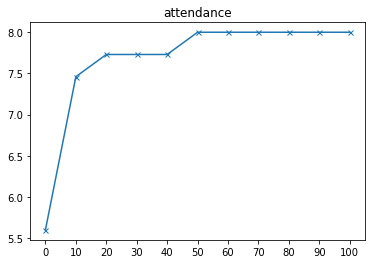

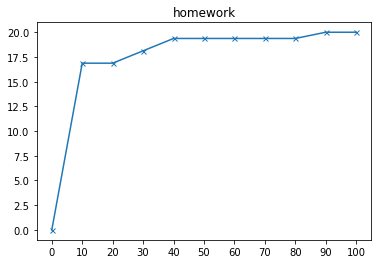

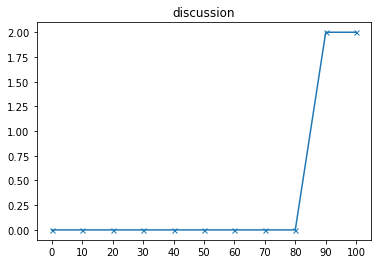

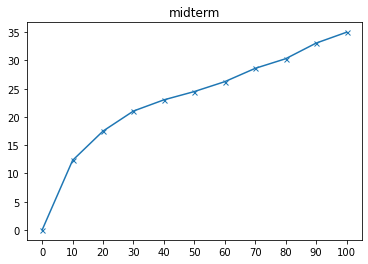

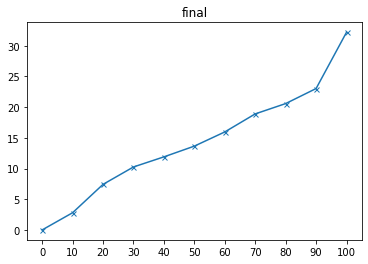

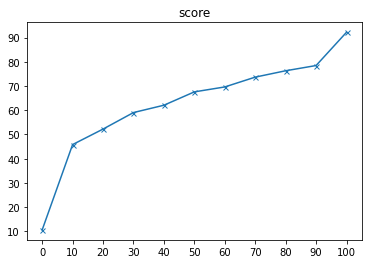

In [6]:
def percentile_plot(attr):
    percentile = np.percentile(attr, np.arange(0, 101, 10))
    plt.plot(np.arange(0, 101, 10), percentile, marker = 'x', markersize = 5)
    plt.xticks(np.arange(0, 101, 10))
    plt.show()
    plt.close()

plt.title('attendance')
percentile_plot(df2['attendance'])

plt.title('homework')
percentile_plot(df2['homework'])

plt.title('discussion')
percentile_plot(df2['discussion'])

plt.title('midterm')
percentile_plot(df2['midterm'])

plt.title('final')
percentile_plot(df2['final'])

plt.title('score')
percentile_plot(df2['score'])

* percentile plot의 속성을 설정하고 그래프를 출력하는 함수를 선언했다.   
* **np.arange(0, 101, 10)** 코드를 통해 백분위수를 0~100까지, 값을 10단위로 나누어 그래프에 찍는다.   
* marker의 모양은 'x'로, marker의 사이트는 5로 설정했다. 
* **plt.xticks(np.arange(0, 101, 10))** 코드를 활용하여 시각화 되는 그래프의 x축이 10단위로 나뉘도록 하였다. 
* grade를 제외한 모든 컬럼에 대해서 percentile plot을 출력했다.

----
#### 5. boxplot ( grade제외 )

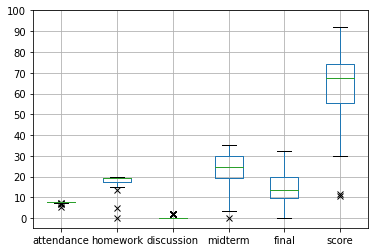

In [7]:
df2.boxplot(flierprops = dict(marker = 'x'))
plt.yticks(np.arange(0, 101, step = 10))
plt.show()
plt.close()

* 데이터프레임에 boxplot()함수를 활용해서 boxplot그래프를 출력했다. 
* **plt.yticks(np.arange(0, 101, step = 10))** 코드를 활용해서 시각화 되는 그래프의 y축을 0부터 100까지, 10단위로 나위어 보이도록 하였다.

----
#### 6. histogram ( 모든 애트리뷰트 )

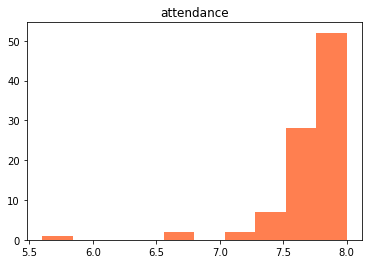

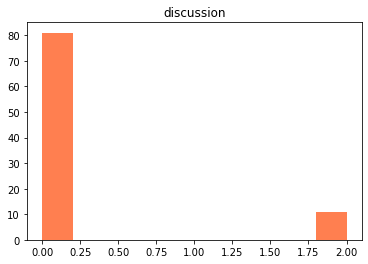

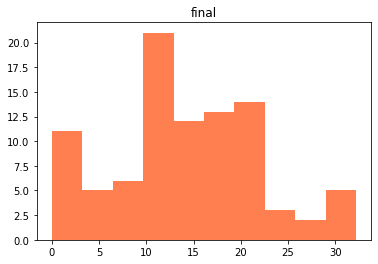

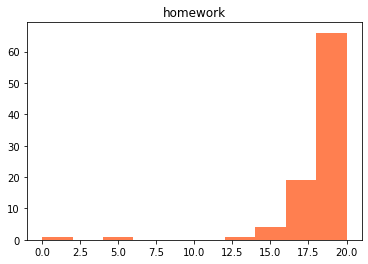

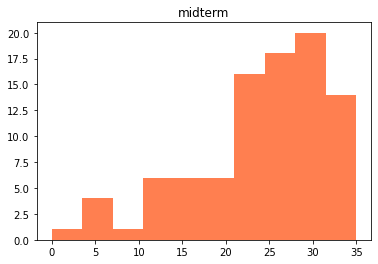

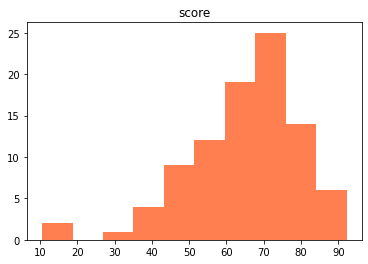

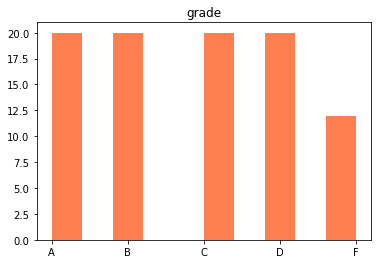

In [8]:
plt.hist(df['attendance'], color = 'coral')
plt.title("attendance")
plt.show()

plt.hist(df['discussion'], color = 'coral')
plt.title("discussion")
plt.show()

plt.hist(df['final'], color = 'coral')
plt.title("final")
plt.show()

plt.hist(df['homework'], color = 'coral')
plt.title("homework")
plt.show()

plt.hist(df['midterm'], color = 'coral')
plt.title("midterm")
plt.show()

plt.hist(df['score'], color = 'coral')
plt.title("score")
plt.show()

plt.hist(df['grade'], color = 'coral')
plt.title("grade")
plt.show()

* plt.hist()함수를 활용해서 히스토그램을 출력했다. 

----
#### 7. scatter plot ( grade제외, 모든 가능한 attribute조합 )

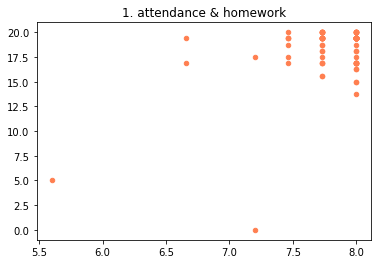

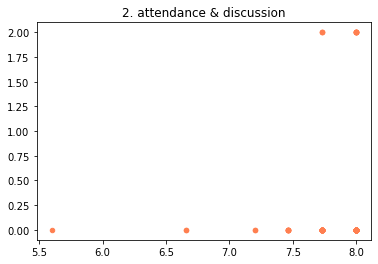

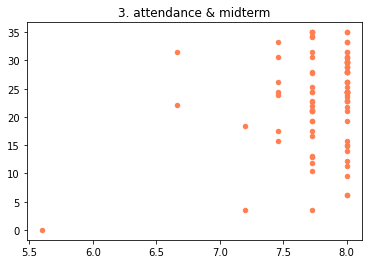

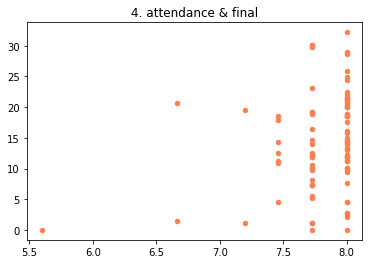

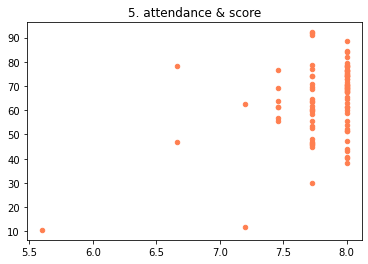

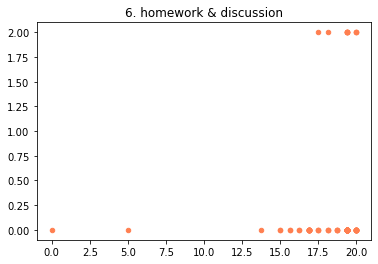

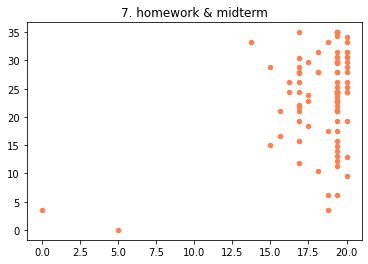

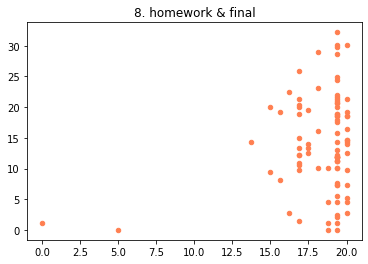

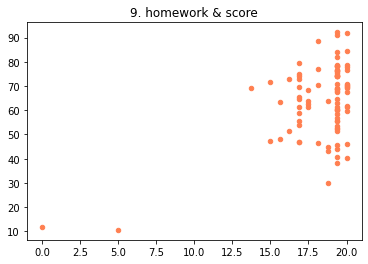

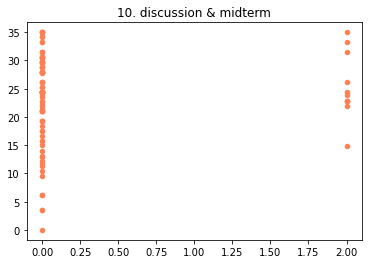

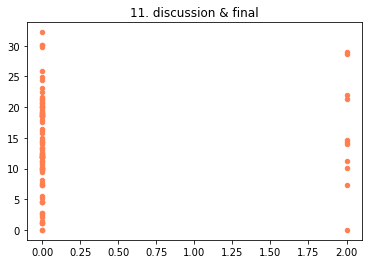

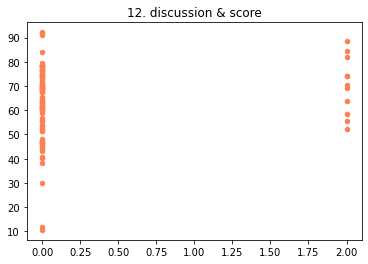

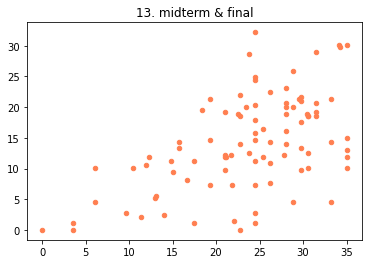

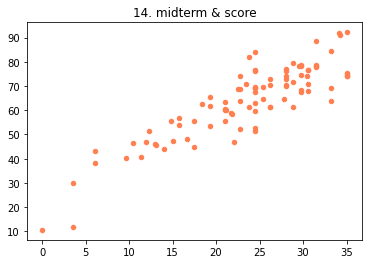

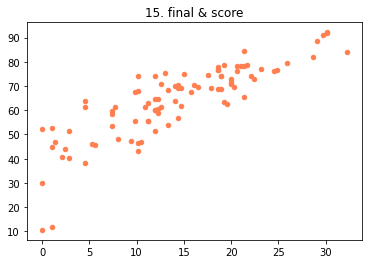

In [9]:
plt.scatter(df['attendance'], df['homework'], s = 20, color = 'coral')
plt.title('1. attendance & homework')
plt.show()

plt.scatter(df['attendance'], df['discussion'], s = 20, color = 'coral')
plt.title('2. attendance & discussion')
plt.show()

plt.scatter(df['attendance'], df['midterm'], s = 20, color = 'coral')
plt.title('3. attendance & midterm')
plt.show()

plt.scatter(df['attendance'], df['final'], s = 20, color = 'coral')
plt.title('4. attendance & final')
plt.show()

plt.scatter(df['attendance'], df['score'], s = 20, color = 'coral')
plt.title('5. attendance & score')
plt.show()

plt.scatter(df['homework'], df['discussion'], s = 20, color = 'coral')
plt.title('6. homework & discussion')
plt.show()

plt.scatter(df['homework'], df['midterm'], s = 20, color = 'coral')
plt.title('7. homework & midterm')
plt.show()

plt.scatter(df['homework'], df['final'], s = 20, color = 'coral')
plt.title('8. homework & final')
plt.show()

plt.scatter(df['homework'], df['score'], s = 20, color = 'coral')
plt.title('9. homework & score')
plt.show()

plt.scatter(df['discussion'], df['midterm'], s = 20, color = 'coral')
plt.title('10. discussion & midterm')
plt.show()

plt.scatter(df['discussion'], df['final'], s = 20, color = 'coral')
plt.title('11. discussion & final')
plt.show()

plt.scatter(df['discussion'], df['score'], s = 20, color = 'coral')
plt.title('12. discussion & score')
plt.show()

plt.scatter(df['midterm'], df['final'], s = 20, color = 'coral')
plt.title('13. midterm & final')
plt.show()

plt.scatter(df['midterm'], df['score'], s = 20, color = 'coral')
plt.title('14. midterm & score')
plt.show()

plt.scatter(df['final'], df['score'], s = 20, color = 'coral')
plt.title('15. final & score')
plt.show()

* 'grade'를 제외한 속성으로 만들 수 있는 조합은 총 15개로, 15개의 조합에 대한 scatter plot을 모두 출력했다. 
* 상관관계를 파악할 수 있을 만한 조합으로는 midterm & final, midterm & score, final & score 으로 확인된다.
* **midterm & final** :  
midterm의 점수가 높은 학생이 final점수도 높을 수 있지만, scatter plot의 넓이가 넓기 때문에, 신뢰성은 떨어진다.  
* **midterm & score** :  
midterm & final의 scatter plot에 비해, 넓이가 좁기 때문에, midterm 점수가 높은 학생이 score 점수도 높다고 할 수 있다.  
* **final & score** :  
midter & score과 마찬가지로 scatter plot의 넓이가 좁기 떄문에, final 점수가 높은 학생이 score 점수도 높다고 할 수 있다. 

In [2]:
import sys

print("--sys.version-")
print(sys.version)
      

--sys.version-
3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
